# Beta and Dirichlet plot

In [1]:
'''Functions for drawing contours of Dirichlet distributions.'''

# Author: Thomas Boggs

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
%matplotlib inline

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.

    Arguments:

        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).

    Arguments:

        `dist`: A distribution instance with a `pdf` method.

        `border` (bool): If True, the simplex border is drawn.

        `nlevels` (int): Number of contours to draw.

        `subdiv` (int): Number of recursive mesh subdivisions to create.

        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.text(.005, -.05, 'boxed italics text in data coords', style='italic')

    plt.text(.2, .6, r'an equation: $E=mc^2$', fontsize=15)

    plt.text(.3, .2, u'unicode: Institut f\374r Festk\366rperphysik')

    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.

    Arguments:

        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.

        `barycentric` (bool): Indicates if `X` is in barycentric coords.

        `border` (bool): If True, the simplex border is drawn.

        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

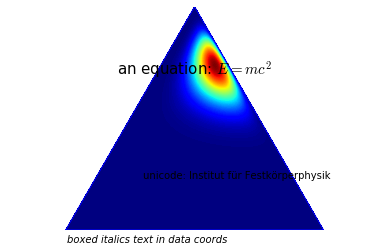

In [2]:
draw_pdf_contours(Dirichlet([2, 5, 15]), border=True)
plt.show()

In [3]:
import shm_kmer_model_estimator.standard_model_estimations as standard_model_estimations

In [4]:
igh_model = standard_model_estimations.full_all_chains_model()['NoKNeighbours']['IGH']
igk_model = standard_model_estimations.full_all_chains_model()['NoKNeighbours']['IGK']
igl_model = standard_model_estimations.full_all_chains_model()['NoKNeighbours']['IGL']

In [5]:
import scipy.stats as sp
import numpy as np

In [6]:
def plot_beta(beta_params, left_bound=0., right_bound=1.):
    x = np.arange(left_bound, right_bound, 0.0001)
    y = sp.beta.pdf(a=beta_params[0], b=beta_params[1], x=x)
    ax = plt.subplot(111)
    ax.plot(x, y)

In [18]:
def plot_beta_all_chains(kmer, left_bound=0., right_bound=1.):
    igh_model = standard_model_estimations.full_all_chains_model()['NoKNeighbours']['IGH']
    igk_model = standard_model_estimations.full_all_chains_model()['NoKNeighbours']['IGK']
    igl_model = standard_model_estimations.full_all_chains_model()['NoKNeighbours']['IGL']
    plot_beta(igk_model.beta_params(kmer=kmer),
              left_bound=left_bound,
              right_bound=right_bound)
    plot_beta(igl_model.beta_params(kmer=kmer),
              left_bound=left_bound,
              right_bound=right_bound)
    plot_beta(igh_model.beta_params(kmer=kmer),
              left_bound=left_bound,
              right_bound=right_bound)
    plt.legend(['IGK', 'IGL', 'IGH'])
    plt.title('Density of Beta for 5-mer ' + kmer)
    #plt.annotate(fontsize='xx-small')
    plt.savefig('/Users/andrewbzikadze/Desktop/Unknown.png', format='png', dpi=600)

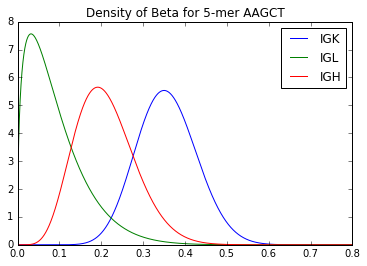

In [19]:
plot_beta_all_chains(kmer='AAGCT', right_bound=0.8)